In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


# Example with Stock Returns

As a note, currently, a lot of the methods to pull stock data off Yahoo Finance are deprecated. The Yahoo Finance package on Python also doesn't work anymore (as of 11/2017). There is also a "fix_yahoo_finance" package that sometimes works and sometimes doesn't. 

So we'll begin by going about this old fashioned way...

In [3]:
data = pd.read_csv('^GSPC.csv')

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000


In [5]:
data['Date'] = [datetime.datetime.strptime(data['Date'][i], '%m/%d/%y').\
                strftime('%Y-%m-%d') for i in range(len(data['Date']))]

In [7]:
data.describe() #analogous to R's summary(df1) function

,Open,High,Low,Close,Adj Close,Volume
count,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7.088000e+03
mean,1162.249511,1169.086352,1154.974812,1162.542539,1162.542539,2.096070e+09
std,553.263994,555.269957,551.109899,553.369057,553.369057,1.772227e+09
min,295.450012,301.450012,294.510010,295.459991,295.459991,1.499000e+07
25%,747.622513,752.290009,742.322494,747.935028,747.935028,4.652750e+08
50%,1160.484985,1167.750000,1150.769959,1160.729981,1160.729981,1.492785e+09
75%,1414.030030,1422.397491,1405.987457,1414.004944,1414.004944,3.488715e+09
max,2867.229980,2872.870117,2851.479980,2872.870117,2872.870117,1.145623e+10


Text(0.5,1,'S&P 500 Adjusted Close')

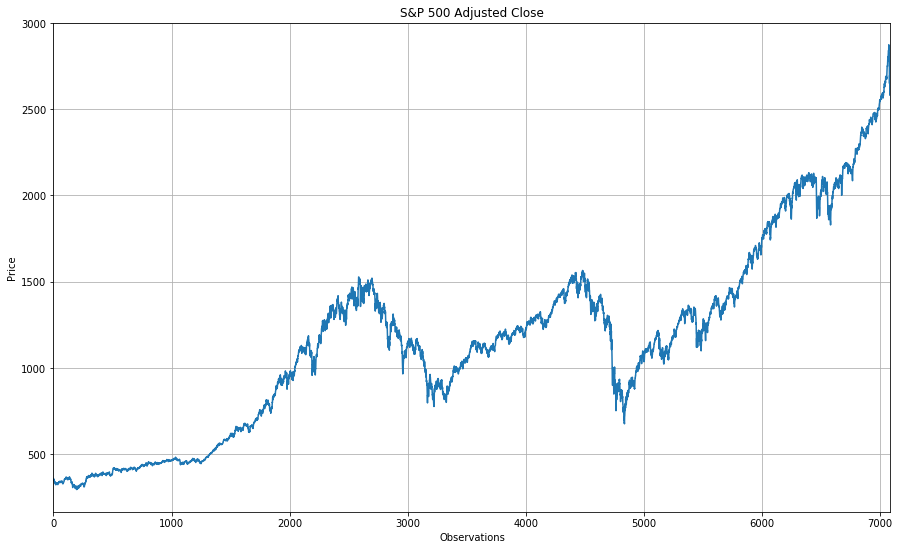

In [9]:
data['Adj Close'].plot(grid=True)
plt.xlabel("Observations")
plt.ylabel("Price")
plt.title("S&P 500 Adjusted Close")

Pandas has a nice built percentage change attribute where you can calculate the differences between observations (like getReturns() in R).

Text(0.5,1,'S&P 500 Returns')

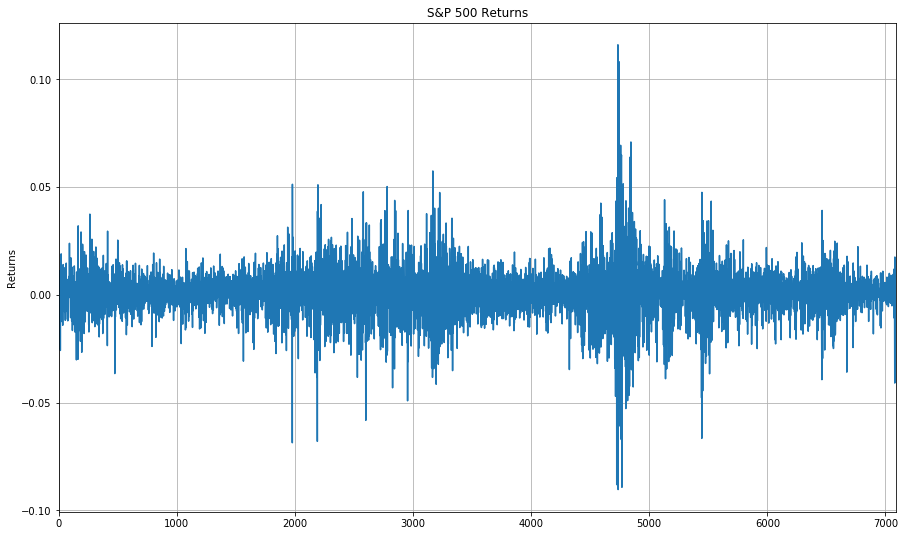

In [10]:
returns = data['Adj Close'].pct_change(1)
returns.plot(grid=True)
plt.ylabel("Returns")
plt.title("S&P 500 Returns")

In [11]:
sentiment = pd.read_csv("sentiment_daily.csv")

In [12]:
sentiment.head()

,Unnamed: 0,Date,score,year,month
0,1,1987-01-01,0.421937,1987,1
1,2,1987-01-02,0.171172,1987,1
2,3,1987-01-03,0.393791,1987,1
3,4,1987-01-04,3.527484,1987,1
4,5,1987-01-05,1.054436,1987,1


In [13]:
sentiment = sentiment[sentiment['year'] >= 1990]
sentiment  = sentiment[['Date', 'score']]

In [14]:
sentiment.head()

,Date,score
1094,1990-01-01,3.579676
1095,1990-01-02,-2.826623
1096,1990-01-03,-3.914114
1097,1990-01-04,1.373843
1098,1990-01-05,-0.106316


In [15]:
sentiment = sentiment.interpolate()

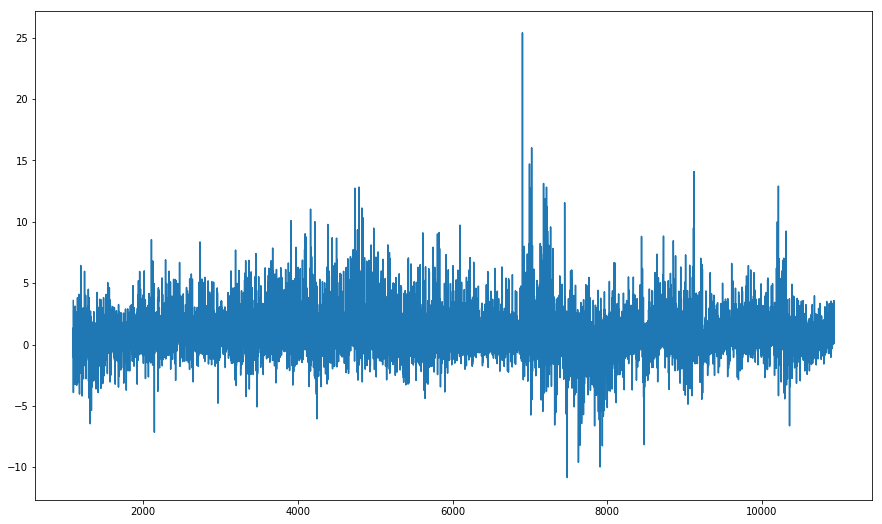

In [16]:
plt.plot(sentiment['score'])

In [17]:
df = pd.merge(sentiment, data, on = 'Date')
df.head()

,Date,score,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,-2.826623,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1,1990-01-03,-3.914114,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
2,1990-01-04,1.373843,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
3,1990-01-05,-0.106316,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
4,1990-01-08,0.587122,352.200012,354.239990,350.540009,353.790009,353.790009,140110000


Text(0.5,0,'Sentiment Score')

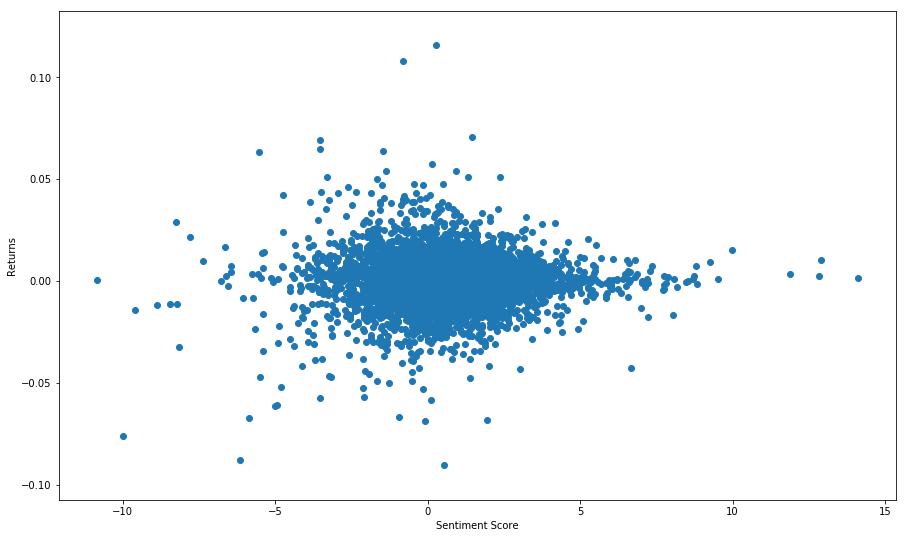

In [18]:
plt.scatter(df['score'], df['Adj Close'].pct_change(1))
plt.ylabel("Returns")
plt.xlabel("Sentiment Score")

In [19]:
volatility = df['Adj Close'].rolling(window = 30).std()
volatility.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Adj Close, dtype: float64

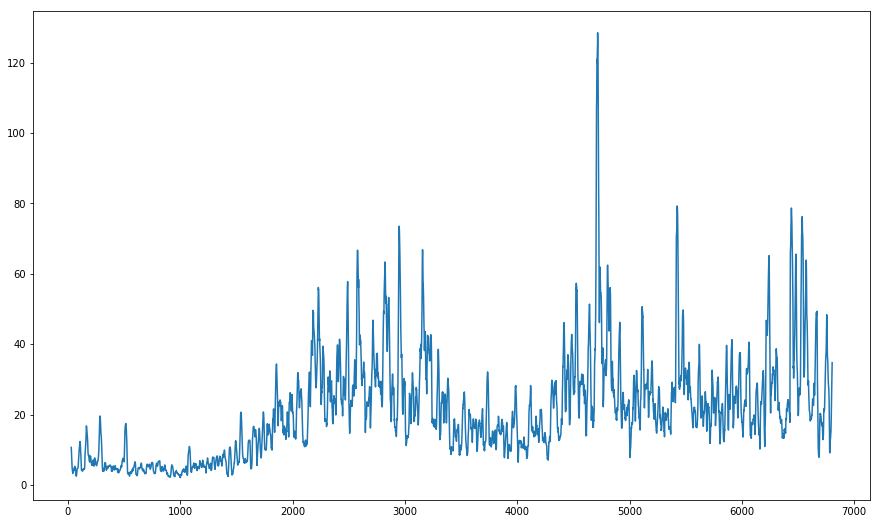

In [20]:
plt.plot(volatility)

Text(0.5,1,'Sentiment versus Volatility (S&P 500) from 1990 - 2017')

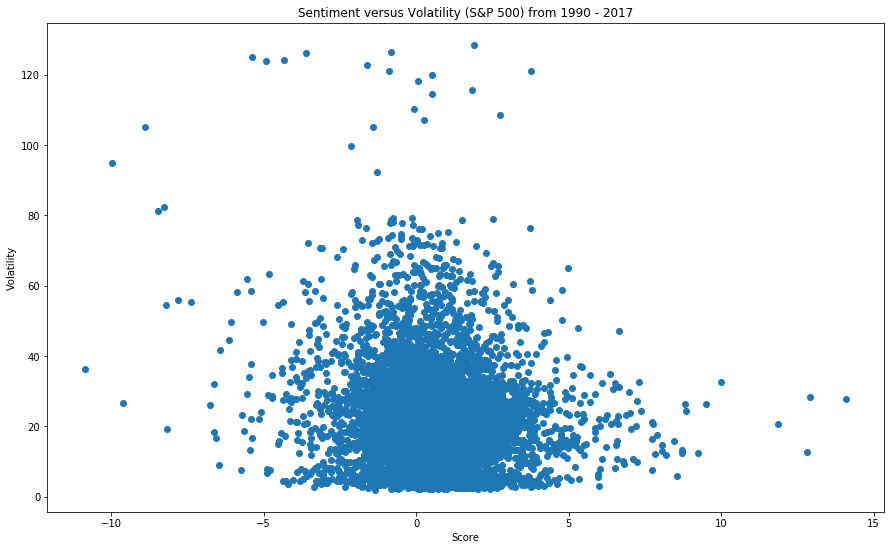

In [21]:
plt.scatter(df['score'], volatility)
plt.xlabel("Score")
plt.ylabel("Volatility")
plt.title("Sentiment versus Volatility (S&P 500) from 1990 - 2017")

In [ ]:
df.to_csv("filename.csv")